In [94]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 4: Binary Classification

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [95]:
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


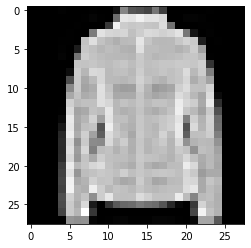

label is Shirt


In [96]:
# PART (a): 
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

l2 norm value: 1404179381.0000002
total loss: [[3.16430545e+09]]


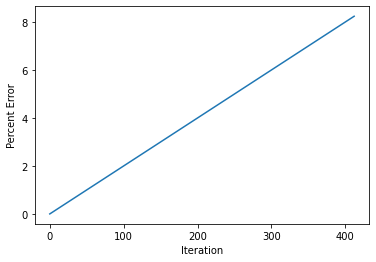

In [100]:
# PART (b),(c): 
# Implement the perceptron Algorithm and compute the number of mis-classified point
N = X_train.shape[0] # Number of data point train
N_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features
loss_hist = []
W = np.zeros((d+1,1))
X_train_h = np.hstack((np.ones((N,1)), X_train))
X_test_h = np.hstack((np.ones((N_test,1)), X_test))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test accuracy in the same plot
# for m range from 1 to N
# ================================================================ #
"""
MAX_ITER = 100
for n in range(MAX_ITER):
    curr_misclass = 0
    for x_c in range(N): 
        alpha = np.dot(W.T,X_train_h[x_c])[0]
        #print(alpha)
        if (alpha*y_train[x_c]) <= 0:
            #print(((y_train[x_c])*X_train_h[x_c]).shape)
            W = W + np.multiply((y_train[x_c]),X_train_h[x_c])
            curr_misclass += 1
    loss_hist.append(curr_misclass)
    #print(W)
print(loss_hist)    
"""    


def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    w = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    total_loss = 0
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
                        
            # Calculating prediction/hypothesis.
            if (np.dot(x_i.T, w) * y[idx]) <= 0:
            # Updating if the example is misclassified.
                w += lr * (y[idx] * x_i)
                # Incrementing by 1.
                n_miss += 1
                percent_miss = n_miss/m
                # Appending percent of misclassified examples at every iteration.                
                n_miss_list.append(percent_miss)
                # Keep track of total loss
                total_loss += np.dot(x_i.T, w) * y[idx]
        
    return w, n_miss_list, total_loss

w_final, loss_list, total_loss = perceptron(X_train, y_train, 1, 1)

# Scale to percentages
percent_loss_list = np.array(loss_list)*100
plt.plot(percent_loss_list)
plt.ylabel('Percent Error')
plt.xlabel('Iteration')

l2 = np.linalg.norm(w_final)**2
print('l2 norm value:', l2)
print('total loss:', total_loss)

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Train Logistic Regression
In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent.

In [101]:
from codes.Logistic import Logistic

In [102]:
## PART (f): 
X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

5000


/Users/meganpham/Desktop/CS M146/NEW AND UPDATED/code/codes/Logistic.py:71: RuntimeWarning: overflow encountered in exp
  self.w = self.w - (1/(m*10))* np.dot(X_train.T,(1/(1 + np.exp(-1*np.dot(self.w.T,X_train[i]))) - y_logis))


Loss function= [0.69314718]
187678.80704850008


In [111]:
## PART (g):
## Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=100, num_iters=5000)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/LR_loss_hist.pdf')
print('Weight squared norm',np.linalg.norm(w,ord=2)**2)
print('Final loss',loss_history[-1])

IndexError: index 784 is out of bounds for axis 0 with size 784

In [104]:
# PART (h)
# Complete predict function in Logisitc.py file and compute the percentage of mis-classified points
y_pred = logistic.predict(X_test)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err,'%')

25100.0 %


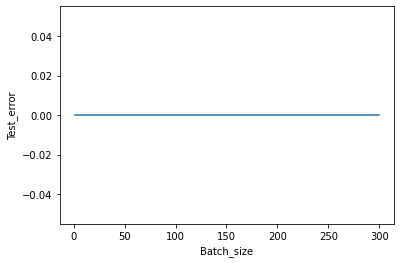

FileNotFoundError: [Errno 2] No such file or directory: './plots/LR_Batch_test.pdf'

In [106]:
## PART (i): 
Batch = [1, 50 , 100, 200, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size. Avergae the test error over 10 times
# ================================================================ #

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

# Problem 5: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [37]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)


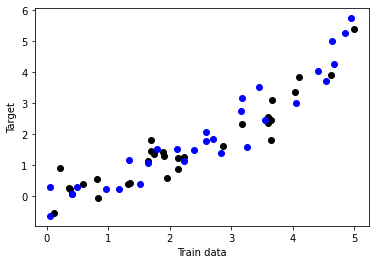

In [38]:
## PART (a): 
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [45]:
from codes.Regression import Regression

In [70]:
## PART (c): 
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value 4.282380633012861
Gradient value [[ -3.19217252]
 [-10.44504584]]


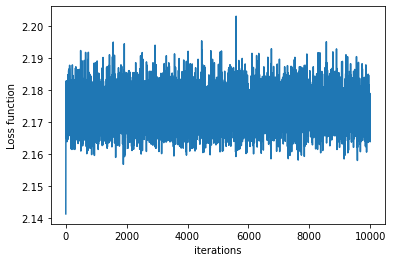

[[-0.00333443]
 [-0.0058999 ]]
Final loss: 2.165127693110372


In [82]:
## PART (d): 
## Complete train_LR function in Regression.py file 
loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print('Final loss:',loss_history[-1])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/meganpham/Desktop/CS M146/NEW AND UPDATED/code/codes/Regression.py:153: RuntimeWarning: overflow encountered in square
  loss = (np.sum(np.square(y_pred - y))/batch_size + param*np.linalg.norm(w[1:m]))/2
/Users/meganpham/Desktop/CS M146/NEW AND UPDATED/code/codes/Regression.py:148: RuntimeWarning: overflow encountered in double_scalars
  sum += (y[j] - y_pred[j])*x_new[j][i]
/Users/meganpham/Desktop/CS M146/NEW AND UPDATED/code/codes/Regression.py:149: RuntimeWarning: invalid value encountered in multiply
  grad[i] = (w[i] - 2*eta*sum - eta*param*w[i])/batch_size


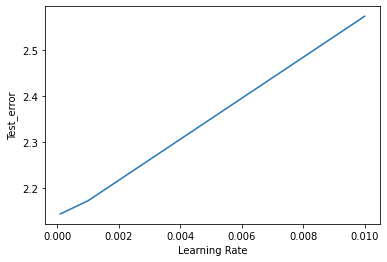

In [84]:
## PART (d) (Different Learning Rates):
from numpy.linalg import norm
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
test_err = np.zeros((len(lrs),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different learning rates and average the test error over 10 times
# ================================================================ #
sum = 0
trials = 10
for i in range(len(lrs)):
    for j in range(trials):
        sum += regression.train_LR(X_train,y_train, eta=lrs[i],batch_size=30, num_iters=10000)[0][-1]
    test_err[i] = sum/trials
    sum = 0
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(lrs,test_err)
plt.xlabel('Learning Rate')
plt.ylabel('Test_error')
plt.show()
#fig.savefig('./plots/LR_Batch_test.pdf')

In [67]:
## PART (e): 
## Complete closed_form function in Regression.py file
loss_2, w_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution gradient',w_2)

Optimal solution loss 2.4308131507365043
Optimal solution gradient [0.76186575]


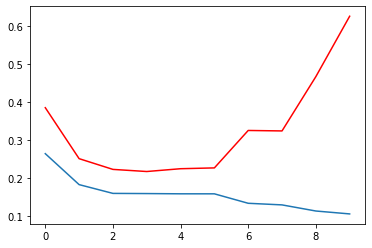

In [85]:
## PART (g): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
for i in range(1, 11):
    reg = Regression(m=i, reg_param=0)
    train_loss[i-1] = reg.closed_form(X_train, y_train)[0]
    test_loss[i-1] = reg.loss_and_grad(X_test, y_test)[0]
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.plot(train_loss)
plt.plot(test_loss, color='red')
plt.show()

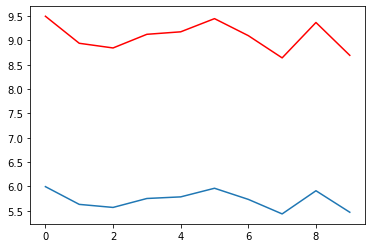

In [91]:
#PART (i): 
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
reg_params = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
for i in range(10):
    reg = Regression(m=2, reg_param=reg_params[i])
    reg.train_LR(X_train, y_train)
    train_loss[i] = reg.loss_and_grad(X_train, y_train)[0]
    test_loss[i] = reg.loss_and_grad(X_test, y_test)[0]
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

plt.plot(train_loss)
plt.plot(test_loss, color='red')
plt.show()